In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

# Once mounted, you can access your Drive files at '/content/drive/My Drive'
print("Drive mounted successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully!


In [7]:
# Load the dataset
data1 = pd.read_csv('/content/drive/MyDrive/benin-malanville.csv')
data2 = pd.read_csv('/content/drive/MyDrive/sierraleone-bumbuna.csv')
data3= pd.read_csv('/content/drive/MyDrive/togo-dapaong_qc.csv')

In [8]:
# Basic EDA for data1
print(data1.info())
print(data1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

**1.Distribution of Solar Irradiation Metrics**

Columns: GHI (Global Horizontal Irradiance), DNI (Direct Normal Irradiance), and DHI (Diffuse Horizontal Irradiance).

Purpose: Identify patterns and ranges of solar irradiance values.

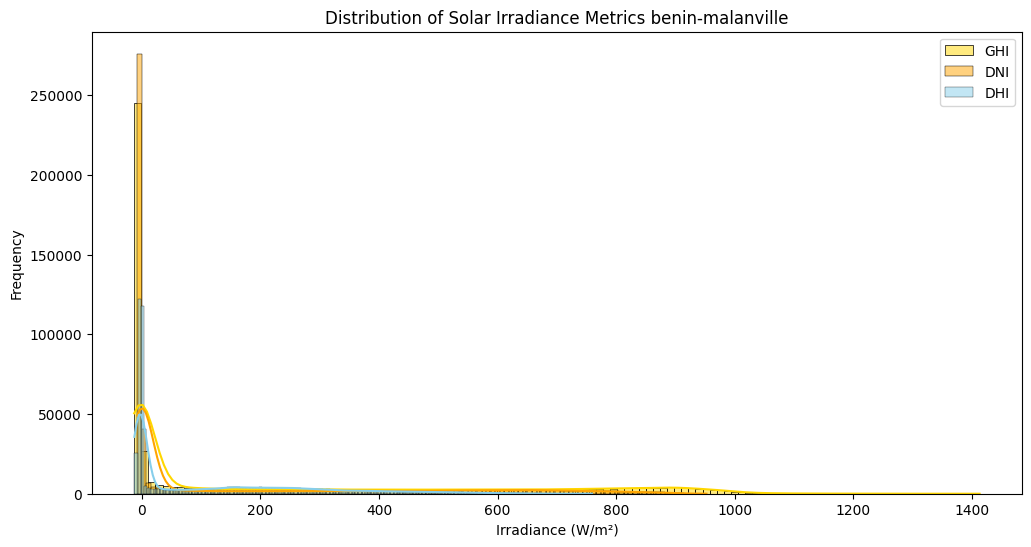

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data1['GHI'], kde=True, color='gold', label='GHI')
sns.histplot(data1['DNI'], kde=True, color='orange', label='DNI')
sns.histplot(data1['DHI'], kde=True, color='skyblue', label='DHI')
plt.title('Distribution of Solar Irradiance Metrics benin-malanville')
plt.xlabel('Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**2.Temporal Analysis of Solar Irradiance**

Column: Timestamp vs GHI, DNI, and DHI.

Purpose: Analyze how solar irradiance varies over time.

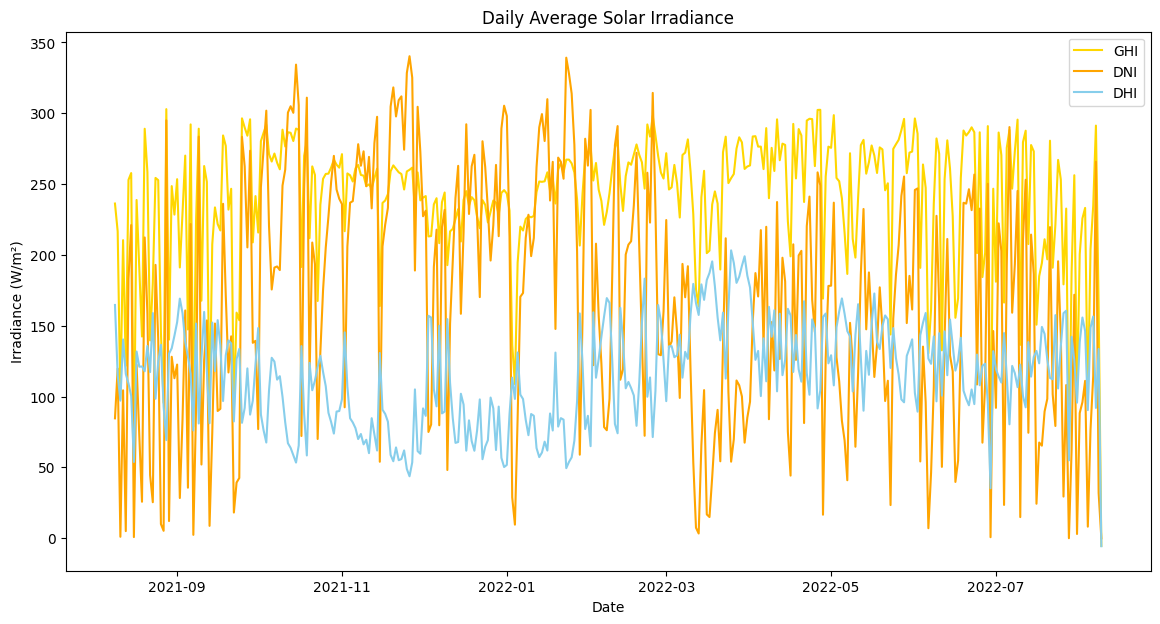

In [14]:
# Convert Timestamp to datetime
data1['Timestamp'] = pd.to_datetime(data1['Timestamp'])

# Aggregate daily averages
daily_data1 = data1.groupby(data1['Timestamp'].dt.date).mean()

# Plot daily trends
plt.figure(figsize=(14, 7))
plt.plot(daily_data1.index, daily_data1['GHI'], label='GHI', color='gold')
plt.plot(daily_data1.index, daily_data1['DNI'], label='DNI', color='orange')
plt.plot(daily_data1.index, daily_data1['DHI'], label='DHI', color='skyblue')
plt.title('Daily Average Solar Irradiance')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.show()

**3. Correlation Heatmap**

Columns: All numerical columns.

Purpose: Identify relationships between solar irradiance and other environmental factors (e.g., Tamb, RH, WS).

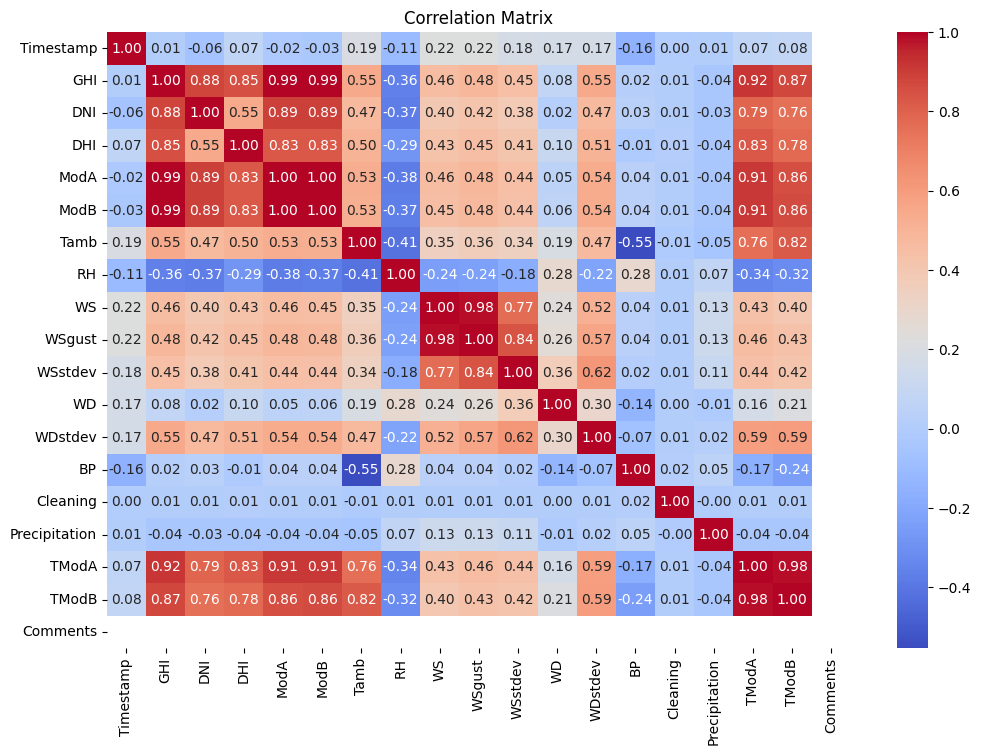

In [15]:
# Compute correlation matrix
corr_matrix = data1.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


**5. Seasonal Trends**

Columns: Extract month and season from Timestamp and analyze GHI.
Purpose: Determine seasonal variations in solar potential.

<ipython-input-17-0ccbb397d7f8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='GHI', data=data1, palette='muted')


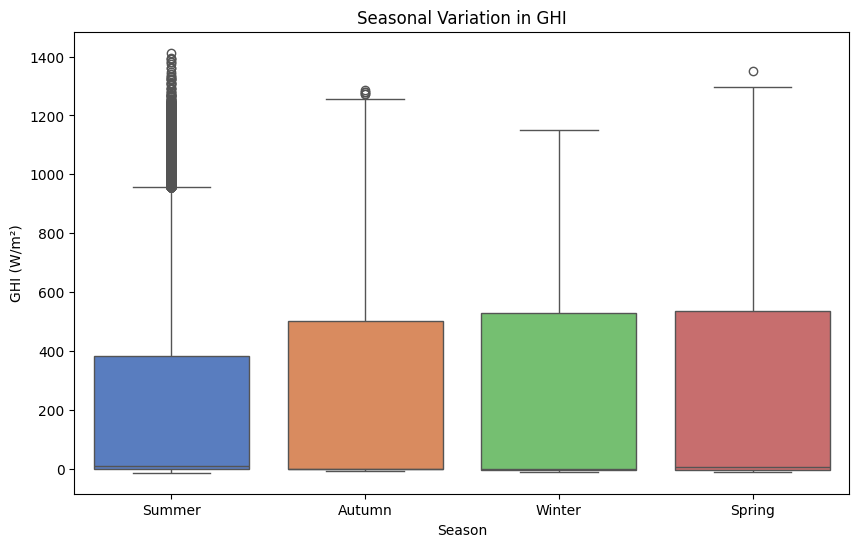

In [17]:
# Extract month and season
data1['Month'] = data1['Timestamp'].dt.month
data1['Season'] = data1['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                 'Spring' if x in [3, 4, 5] else
                                                 'Summer' if x in [6, 7, 8] else
                                                 'Autumn')

# Boxplot by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='GHI', data=data1, palette='muted')
plt.title('Seasonal Variation in GHI')
plt.xlabel('Season')
plt.ylabel('GHI (W/m²)')
plt.show()

**6.Wind Speed and Solar Irradiance Relationship**

Columns: WS (Wind Speed) vs GHI.

Purpose: Determine if wind speed impacts solar potential.

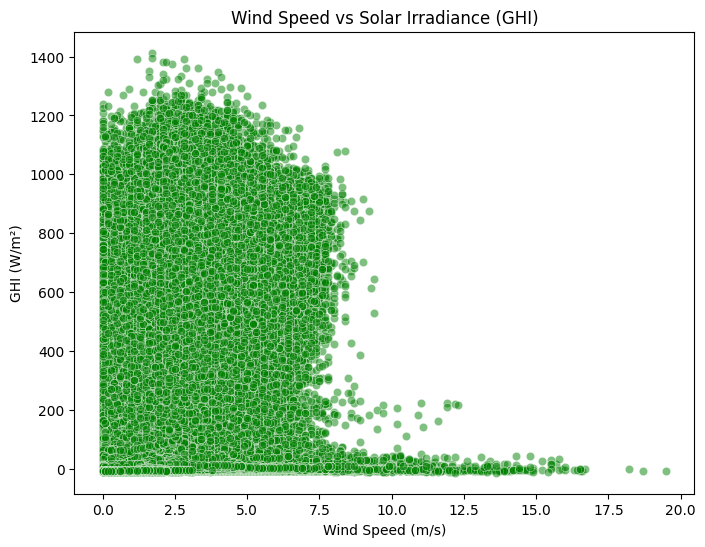

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WS', y='GHI', data=data1, alpha=0.5, color='green')
plt.title('Wind Speed vs Solar Irradiance (GHI)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.show()

**7. Compare Module Performance**
Columns: ModA, ModB, TModA, TModB.

Purpose: Assess the performance of solar modules.





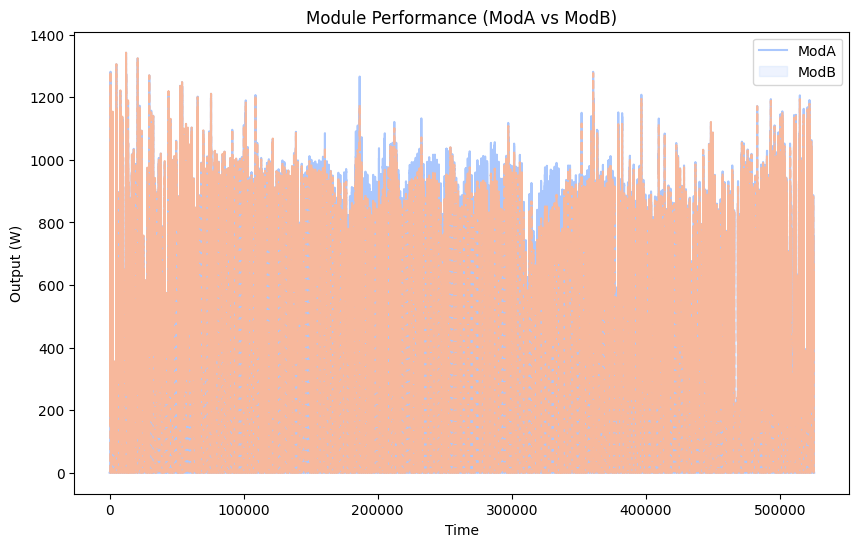

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data1[['ModA', 'ModB']], palette='coolwarm')
plt.title('Module Performance (ModA vs ModB)')
plt.xlabel('Time')
plt.ylabel('Output (W)')
plt.legend(['ModA', 'ModB'])
plt.show()

In [24]:
# Basic EDA for data2
print(data2.info())
print(data2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

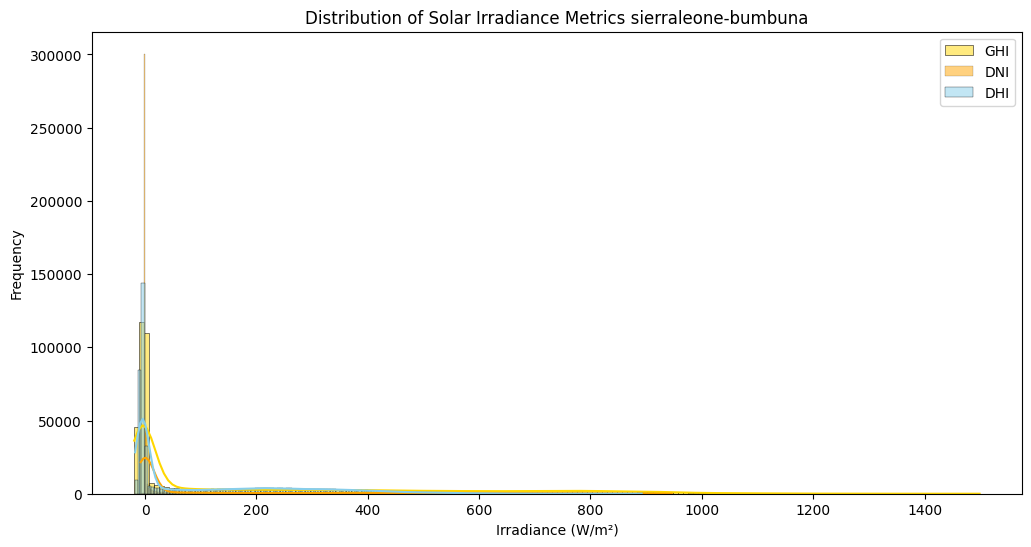

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data2['GHI'], kde=True, color='gold', label='GHI')
sns.histplot(data2['DNI'], kde=True, color='orange', label='DNI')
sns.histplot(data2['DHI'], kde=True, color='skyblue', label='DHI')
plt.title('Distribution of Solar Irradiance Metrics sierraleone-bumbuna')
plt.xlabel('Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

2.Temporal Analysis of Solar Irradiance for sierraleone-bumbuna

Column: Timestamp vs GHI, DNI, and DHI.

Purpose: Analyze how solar irradiance varies over time.

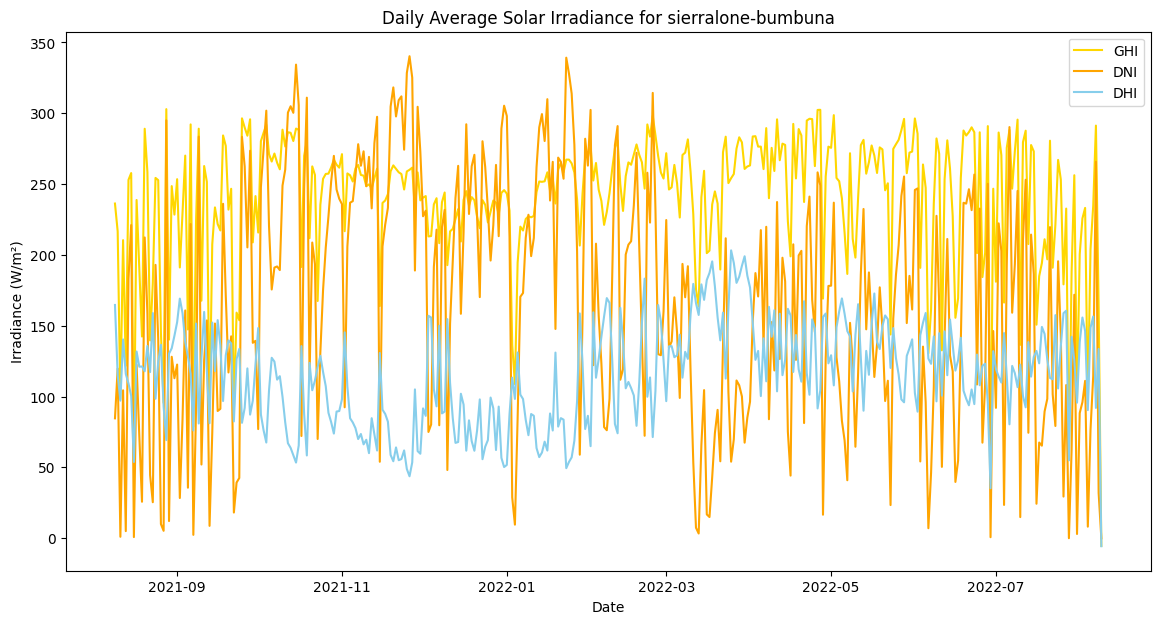

In [26]:

# Convert Timestamp to datetime
data2['Timestamp'] = pd.to_datetime(data2['Timestamp'])

# Aggregate daily averages
daily_data2 = data2.groupby(data2['Timestamp'].dt.date).mean()

# Plot daily trends
plt.figure(figsize=(14, 7))
plt.plot(daily_data1.index, daily_data1['GHI'], label='GHI', color='gold')
plt.plot(daily_data1.index, daily_data1['DNI'], label='DNI', color='orange')
plt.plot(daily_data1.index, daily_data1['DHI'], label='DHI', color='skyblue')
plt.title('Daily Average Solar Irradiance for sierralone-bumbuna')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.show()


3. Correlation Heatmap for sierralone-bumbuna

Columns: All numerical columns.

Purpose: Identify relationships between solar irradiance and other environmental factors (e.g., Tamb, RH, WS).

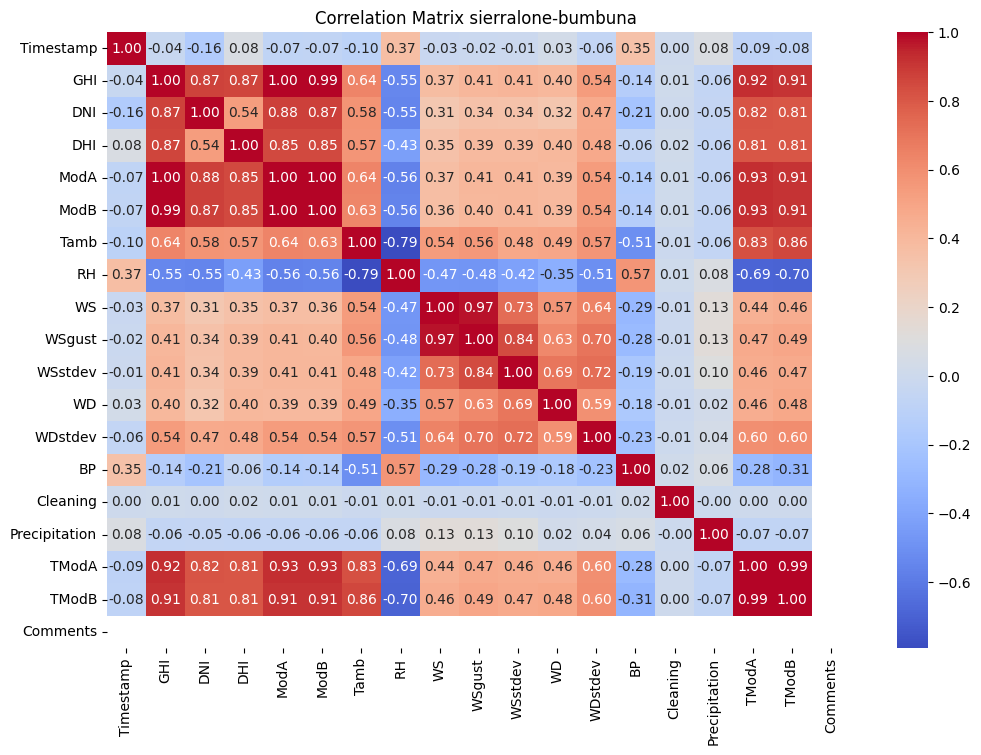

In [27]:
corr_matrix = data2.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix sierralone-bumbuna ')
plt.show()


4. Seasonal Trends
Columns: Extract month and season from Timestamp and analyze GHI.
Purpose: Determine seasonal variations in solar potential.

In [25]:
# Basic EDA for data3
print(data3.info())
print(data3.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

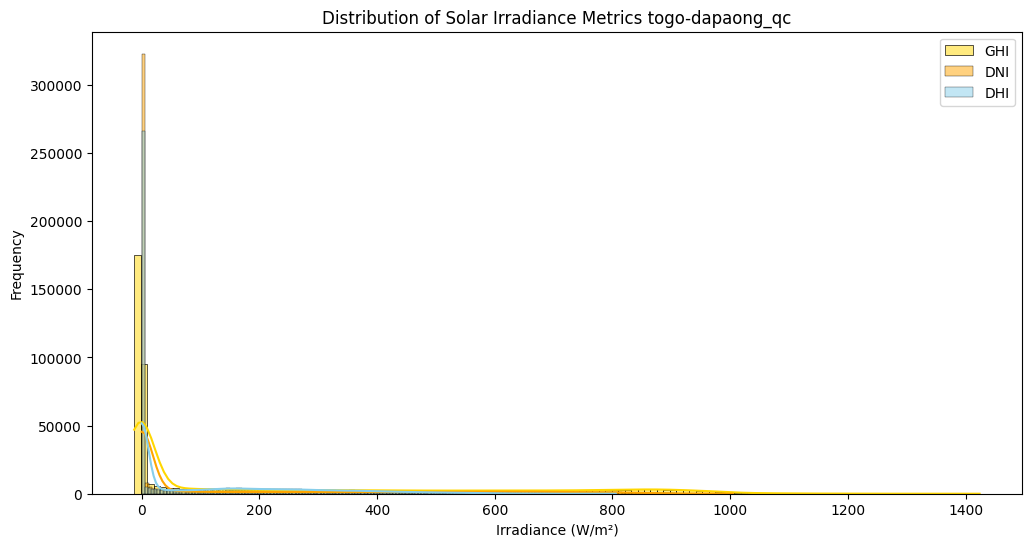

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data3['GHI'], kde=True, color='gold', label='GHI')
sns.histplot(data3['DNI'], kde=True, color='orange', label='DNI')
sns.histplot(data3['DHI'], kde=True, color='skyblue', label='DHI')
plt.title('Distribution of Solar Irradiance Metrics togo-dapaong_qc')
plt.xlabel('Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.legend()
plt.show()